In [1]:
from sklearn.datasets import make_regression

In [2]:
import numpy as np

In [3]:
X,y=make_regression(n_samples=4,n_features=1,n_targets=1,noise=80,random_state=13,n_informative=1)

In [4]:
import pandas as pd
df2=pd.DataFrame(y)
df1=pd.DataFrame(X)
df=pd.concat([df1,df2],axis=1)
df

,0,0
0,-0.712391,7.217866
1,0.451812,16.046099
2,-0.044503,-27.837562
3,0.753766,144.366882


In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
import matplotlib.pyplot as plt

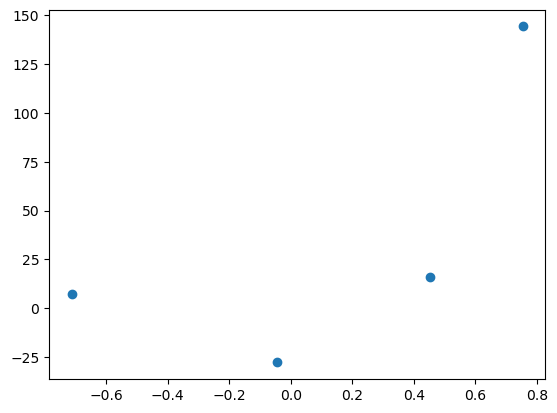

In [7]:
plt.scatter(X,y)

In [8]:
lr=LinearRegression()

In [9]:
lr.fit(X,y)

LinearRegression()

In [10]:
lr.coef_

array([78.35063668])

In [11]:
lr.intercept_

26.15963284313262

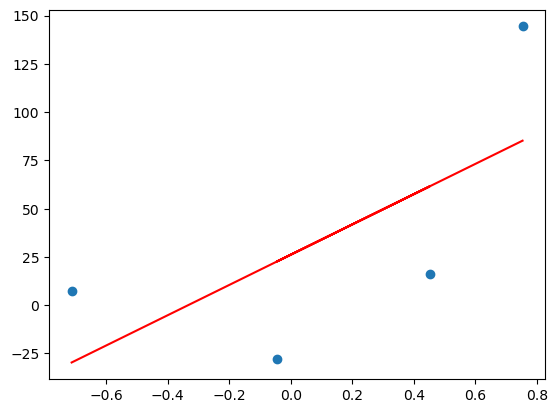

In [12]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='r')

In [13]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
b=100
y_pred = 78.35*X + b

In [14]:
y_pred

array([[ 44.18419163],
       [135.39949674],
       [ 96.51318381],
       [159.05759577]])

In [15]:
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

In [16]:
y_pred=y_pred.reshape(4)

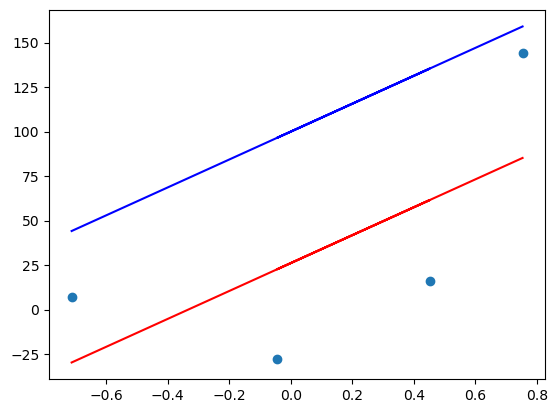

In [17]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='r')
plt.plot(X,y_pred,color='b')

In [18]:
slope=-2*np.sum(y-y_pred)

In [19]:
slope

590.7223659179078

In [20]:
lrate=0.1
b=b-lrate*slope
b

40.927763408209216

In [21]:
m=78.35
y_pred1=(m*X + b).reshape(4)
y_pred1

array([-14.88804496,  76.32726015,  37.44094722,  99.98535918])

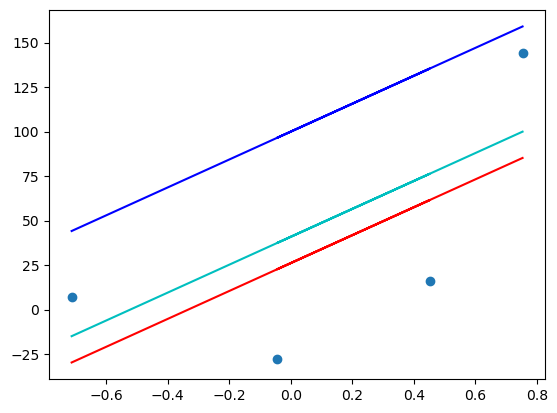

In [22]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='r')
plt.plot(X,y_pred,color='b')
plt.plot(X,y_pred1,color='c')

In [23]:
slope1=-2*np.sum(y-y_pred1)
b=b-lrate*slope1
y_pred2=(m*X + b).reshape(4)

In [24]:
b

29.11331608985106

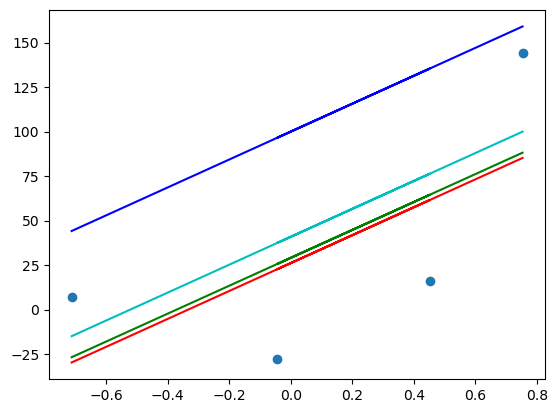

In [25]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='r')
plt.plot(X,y_pred,color='b')
plt.plot(X,y_pred1,color='c')
plt.plot(X,y_pred2,color='g')

In [26]:
slope2=-2*np.sum(y-y_pred2)
b=b-lrate*slope2
y_pred3=(m*X + b).reshape(4)

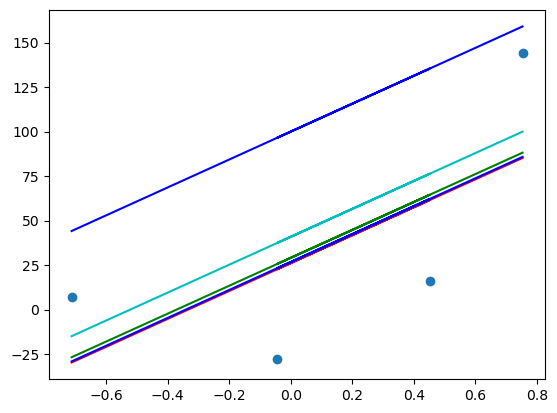

In [27]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='r')
plt.plot(X,y_pred,color='b')
plt.plot(X,y_pred1,color='c')
plt.plot(X,y_pred2,color='g')
plt.plot(X,y_pred3,color='b')

In [28]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [29]:
X.ravel()

array([-0.71239066,  0.45181234, -0.04450308,  0.75376638])

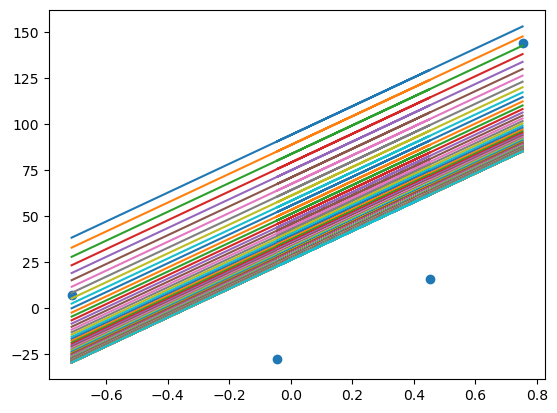

In [31]:
# Flattening: The ravel() method flattens the array X into 
# a one-dimensional array by concatenating all of its rows 
# one after another.
m=78.35
b=100
lrate=0.01
epochs=100

for i in range(epochs):
    slope=-2*np.sum(y-m*X.ravel()-b)
    b=b-lrate*slope
    
    y_pred=(m*X + b).reshape(4)
    plt.plot(X,y_pred)
plt.scatter(X,y)